# Model Training

Train and evaluate multiple models with hyperparameter tuning

In [3]:
import sys
sys.path.append('../')
from src.models import ModelTrainer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# load preprocessed data
X_train = np.load('../data/processed/X_train_processed.npy')
X_val = np.load('../data/processed/X_val_processed.npy')
y_train = np.load('../data/processed/y_train.npy')
y_val = np.load('../data/processed/y_val.npy')

print('Data shapes: ')
print('X_train: ', X_train.shape)
print('X_val: ', X_val.shape)
print('y_train: ', y_val.shape)
print('y_val: ', y_val.shape)

Data shapes: 
X_train:  (712, 24)
X_val:  (179, 24)
y_train:  (179,)
y_val:  (179,)


In [4]:
# Train Models
trainer = ModelTrainer()
trainer.train_all_models(X_train, y_train, X_val, y_val)

# Save results
trainer.save_results()

Training decision_tree...
Best validation accuracy for decision_tree: 0.8547
Training random_forest...
Best validation accuracy for random_forest: 0.8268
Training xgboost...
Best validation accuracy for xgboost: 0.8380


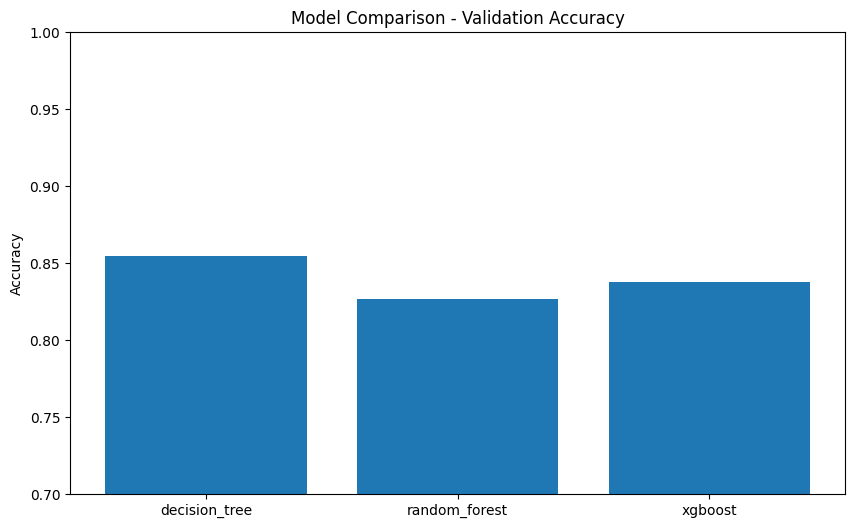

In [11]:
# Visualize results
def plot_model_comparison(trainer):
    # Get validation accuracy for each model
    scores = {
        name: scores['validation_accuracy'] 
        for name, scores in trainer.best_scores.items() 
    }
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(list(scores.keys()), list(scores.values())) 
    
    plt.title('Model Comparison - Validation Accuracy')
    plt.ylabel('Accuracy')
    
    plt.ylim(0.7, 1.0)
    plt.show()

# Create plot
plot_model_comparison(trainer)